In [1]:
import pandas as pd

# Load my dataset
df = pd.read_csv(r'C:\Users\user\Desktop\megdel\food_price_API\food_price_with_chartAPI_web_cleaned.csv')
df.head()

,state,zone,date,price,foodName
0,ABIA,S.East,1/1/2017,459.98,Agric eggs medium size
1,ABIA,S.East,2/1/2017,485.81,Agric eggs medium size
2,ABIA,S.East,3/1/2017,519.57,Agric eggs medium size
3,ABIA,S.East,4/1/2017,520.61,Agric eggs medium size
4,ABIA,S.East,5/1/2017,559.66,Agric eggs medium size


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129547 entries, 0 to 129546
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     129547 non-null  object 
 1   zone      129547 non-null  object 
 2   date      129504 non-null  object 
 3   price     129547 non-null  float64
 4   foodName  129547 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.9+ MB


### filter rows with specific states like ABUJA, ABIA, LAGOS, ADAMAWA, RIVERS, and KANO

In [3]:
import pandas as pd

# Assuming your DataFrame is named df
states_to_sort = ['ABUJA', 'ABIA', 'LAGOS', 'ADAMAWA', 'RIVERS', 'KANO']

# Filter rows where 'state' is in the specified list
sorted_df = df[df['state'].isin(states_to_sort)]

# Display the sorted DataFrame
print(sorted_df)


         state     zone             date    price  \
0         ABIA   S.East         1/1/2017   459.98   
1         ABIA   S.East         2/1/2017   485.81   
2         ABIA   S.East         3/1/2017   519.57   
3         ABIA   S.East         4/1/2017   520.61   
4         ABIA   S.East         5/1/2017   559.66   
...        ...      ...              ...      ...   
125670  RIVERS  S.South  4/30/2023 23:00   636.64   
125672   LAGOS   S.West  4/30/2023 23:00   759.44   
125697  RIVERS  S.South  7/31/2023 23:00  2487.07   
125703   LAGOS   S.West  7/31/2023 23:00   688.10   
125704   LAGOS   S.West  7/31/2023 23:00  1953.84   

                                 foodName  
0                  Agric eggs medium size  
1                  Agric eggs medium size  
2                  Agric eggs medium size  
3                  Agric eggs medium size  
4                  Agric eggs medium size  
...                                   ...  
125670                          Yam tuber  
125672     

In [4]:
sorted_df.head(15)

,state,zone,date,price,foodName
0,ABIA,S.East,1/1/2017,459.98,Agric eggs medium size
1,ABIA,S.East,2/1/2017,485.81,Agric eggs medium size
2,ABIA,S.East,3/1/2017,519.57,Agric eggs medium size
3,ABIA,S.East,4/1/2017,520.61,Agric eggs medium size
4,ABIA,S.East,5/1/2017,559.66,Agric eggs medium size
5,ABIA,S.East,6/1/2017,563.93,Agric eggs medium size
6,ABIA,S.East,7/1/2017,520.94,Agric eggs medium size
7,ABIA,S.East,8/1/2017,501.48,Agric eggs medium size
8,ABIA,S.East,9/1/2017,495.92,Agric eggs medium size
9,ABIA,S.East,10/1/2017,510.38,Agric eggs medium size


## separate the date column into year and month columns 

In [5]:
# Alternatively, count occurrences of each unique format
date_counts = sorted_df['date'].value_counts()
print(date_counts)


date
6/30/2023 23:00    258
4/30/2023 23:00    258
7/31/2023 23:00    258
3/1/2023 0:00      258
3/31/2023 23:00    258
                  ... 
6/1/2018 0:00       43
12/7/2022           43
11/6/2022           43
10/5/2022           43
8/1/2017 0:00       43
Name: count, Length: 161, dtype: int64


In [6]:
# Strip time components from the date strings
sorted_df['date'] = sorted_df['date'].str.split().str[0]

C:\Users\user\AppData\Local\Temp\ipykernel_124\2399628775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df['date'] = sorted_df['date'].str.split().str[0]


In [7]:
sorted_df.loc[:, 'date'] = sorted_df['date'].str.split().str[0]

In [8]:
# Convert the cleaned 'date' column to datetime format
sorted_df['date'] = pd.to_datetime(sorted_df['date'], errors='coerce')

# Extract the year and month into separate columns
sorted_df['year'] = sorted_df['date'].dt.year
sorted_df['month'] = sorted_df['date'].dt.month

# Drop the original 'date' column (optional)
sorted_df.drop('date', axis=1, inplace=True)

# Display the updated DataFrame
print(sorted_df)

         state     zone    price                           foodName  year  \
0         ABIA   S.East   459.98             Agric eggs medium size  2017   
1         ABIA   S.East   485.81             Agric eggs medium size  2017   
2         ABIA   S.East   519.57             Agric eggs medium size  2017   
3         ABIA   S.East   520.61             Agric eggs medium size  2017   
4         ABIA   S.East   559.66             Agric eggs medium size  2017   
...        ...      ...      ...                                ...   ...   
125670  RIVERS  S.South   636.64                          Yam tuber  2023   
125672   LAGOS   S.West   759.44                          Yam tuber  2023   
125697  RIVERS  S.South  2487.07                       Beef Bone in  2023   
125703   LAGOS   S.West   688.10  Beans:white black eye. sold loose  2023   
125704   LAGOS   S.West  1953.84                       Beef Bone in  2023   

        month  
0           1  
1           2  
2           3  
3          

C:\Users\user\AppData\Local\Temp\ipykernel_124\1183921762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df['date'] = pd.to_datetime(sorted_df['date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_124\1183921762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df['year'] = sorted_df['date'].dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_124\1183921762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [9]:
import pandas as pd

# Sort the DataFrame by year and month
sorted_df = sorted_df.sort_values(by=['year', 'month'])

# Check if all combinations of year and month are complete
unique_combinations = sorted_df.groupby(['year', 'month']).size()
print("Counts of rows for each year and month combination:")
print(unique_combinations)

# Identify missing combinations
expected_years = sorted_df['year'].unique()
expected_months = range(1, 13)  # Months 1 to 12
all_combinations = [(year, month) for year in expected_years for month in expected_months]

# Find missing combinations
missing_combinations = set(all_combinations) - set(unique_combinations.index)
print("\nMissing year-month combinations:")
print(missing_combinations)

# Check for duplicate rows
duplicate_rows = sorted_df[sorted_df.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Counts of rows for each year and month combination:
year  month
2017  1        258
      2        258
      3        258
      4        258
      5        258
              ... 
2023  2        258
      3        516
      4        258
      6        258
      7        258
Length: 78, dtype: int64

Missing year-month combinations:
{(2023, 10), (2023, 9), (2023, 12), (2023, 5), (2023, 11), (2023, 8)}

Duplicate rows:
          state    zone  price                               foodName  year  \
123069     KANO  N.West  325.0  Evaporated tinned milk carnation 170g  2023   
123644  ADAMAWA  N.East  250.0                       Plantain(unripe)  2023   

        month  
123069      3  
123644      3  


In [10]:
# Remove rows where year is 2023 in place
sorted_df = sorted_df[sorted_df['year'] != 2023].reset_index(drop=True)

# Display the updated DataFrame
print("Data after removing rows for the year 2023:")
print(sorted_df)

# Verify that 2023 data has been removed
print("\nUnique years in the dataset after filtering:")
print(sorted_df['year'].unique())


Data after removing rows for the year 2023:
         state     zone    price                              foodName  year  \
0         ABIA   S.East   459.98                Agric eggs medium size  2017   
1         ABIA   S.East    45.11  Agric eggs(medium size price of one)  2017   
2         ABIA   S.East   471.22                Beans brown,sold loose  2017   
3         ABIA   S.East   420.76     Beans:white black eye. sold loose  2017   
4         ABIA   S.East  1107.67                          Beef Bone in  2017   
...        ...      ...      ...                                   ...   ...   
18569  ADAMAWA   N.East  1751.88                          Beef Bone in  2022   
18570     KANO   N.West   432.60     Beans:white black eye. sold loose  2022   
18571     KANO   N.West  2098.29                          Beef Bone in  2022   
18572   RIVERS  S.South   630.18     Beans:white black eye. sold loose  2022   
18573   RIVERS  S.South  1785.20                          Beef Bone in  2022

In [11]:
print(sorted_df['foodName'].unique())

['Agric eggs medium size' 'Agric eggs(medium size price of one)'
 'Beans brown,sold loose' 'Beans:white black eye. sold loose'
 'Beef Bone in' 'Beef,boneless' 'Bread sliced 500g' 'Bread unsliced 500g'
 'Broken Rice (Ofada)' 'Chicken Feet' 'Chicken Wings'
 'Evaporated tinned milk carnation 170g'
 'Evaporated tinned milk(peak), 170g' 'Frozen chicken'
 'Gari white,sold loose' 'Gari yellow,sold loose' 'Mudfish (aro) fresh'
 'Mudfish : dried' 'Onion bulb' 'Rice agric sold loose'
 'Rice local sold loose' 'Rice Medium Grained'
 'Rice,imported high quality sold loose' 'Tomato' 'Yam tuber'
 'Dried Fish Sardine' 'Iced Sardine' 'Irish potato' 'Sweet potato'
 'Tilapia fish (epiya) fresh' 'Titus:frozen' 'Catfish (obokun) fresh'
 'Catfish :dried' 'Catfish Smoked' 'Mackerel : frozen'
 'Groundnut oil: 1 bottle, specify bottle' 'Maize grain white sold loose'
 'Maize grain yellow sold loose' 'Palm oil: 1 bottle,specify bottle'
 'Plantain(ripe)' 'Plantain(unripe)'
 'Vegetable oil:1 bottle,specify bottle'

In [12]:
# List of desired food names
desired_food_names = [
    'Beans brown,sold loose', 'Beans:white black eye. sold loose',
    'Beef Bone in', 'Beef,boneless',
    'Broken Rice (Ofada)', 'Gari white,sold loose', 'Gari yellow,sold loose',
    'Onion bulb', 'Rice agric sold loose', 'Rice local sold loose',
    'Rice Medium Grained', 'Rice,imported high quality sold loose',
    'Tomato', 'Yam tuber', 'Irish potato', 'Sweet potato',
    'Palm oil: 1 bottle,specify bottle', 'Plantain(ripe)', 'Plantain(unripe)',
    'Wheat flour: prepacked (golden penny 2kg)'
]

# Filter the DataFrame
sorted_df = sorted_df[sorted_df['foodName'].isin(desired_food_names)].reset_index(drop=True)

# Display the updated DataFrame
print("Data after filtering by foodName:")
print(sorted_df)

# Verify the unique values in the foodName column
print("\nUnique food names in the filtered data:")
print(sorted_df['foodName'].unique())


Data after filtering by foodName:
        state     zone    price                           foodName  year  \
0        ABIA   S.East   471.22             Beans brown,sold loose  2017   
1        ABIA   S.East   420.76  Beans:white black eye. sold loose  2017   
2        ABIA   S.East  1107.67                       Beef Bone in  2017   
3      RIVERS  S.South   353.08  Beans:white black eye. sold loose  2017   
4      RIVERS  S.South  1042.48                       Beef Bone in  2017   
...       ...      ...      ...                                ...   ...   
8635  ADAMAWA   N.East  1751.88                       Beef Bone in  2022   
8636     KANO   N.West   432.60  Beans:white black eye. sold loose  2022   
8637     KANO   N.West  2098.29                       Beef Bone in  2022   
8638   RIVERS  S.South   630.18  Beans:white black eye. sold loose  2022   
8639   RIVERS  S.South  1785.20                       Beef Bone in  2022   

      month  
0         1  
1         1  
2         1

In [13]:
# Save the cleaned dataset to a new variable
sorted_work = sorted_df.copy()

In [28]:
sorted_work1 = sorted_work.copy()

In [29]:
sorted_work1

,state,zone,price,foodName,year,month
0,ABIA,S.East,471.22,"Beans brown,sold loose",2017,1
1,ABIA,S.East,420.76,Beans:white black eye. sold loose,2017,1
2,ABIA,S.East,1107.67,Beef Bone in,2017,1
3,RIVERS,S.South,353.08,Beans:white black eye. sold loose,2017,1
4,RIVERS,S.South,1042.48,Beef Bone in,2017,1
...,...,...,...,...,...,...
8635,ADAMAWA,N.East,1751.88,Beef Bone in,2022,12
8636,KANO,N.West,432.60,Beans:white black eye. sold loose,2022,12
8637,KANO,N.West,2098.29,Beef Bone in,2022,12
8638,RIVERS,S.South,630.18,Beans:white black eye. sold loose,2022,12


In [30]:
sorted_work

,state,zone,price,foodName,year,month
0,ABIA,S.East,471.22,"Beans brown,sold loose",2017,1
1,ABIA,S.East,420.76,Beans:white black eye. sold loose,2017,1
2,ABIA,S.East,1107.67,Beef Bone in,2017,1
3,RIVERS,S.South,353.08,Beans:white black eye. sold loose,2017,1
4,RIVERS,S.South,1042.48,Beef Bone in,2017,1
...,...,...,...,...,...,...
8635,ADAMAWA,N.East,1751.88,Beef Bone in,2022,12
8636,KANO,N.West,432.60,Beans:white black eye. sold loose,2022,12
8637,KANO,N.West,2098.29,Beef Bone in,2022,12
8638,RIVERS,S.South,630.18,Beans:white black eye. sold loose,2022,12


In [59]:
sorted_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     8640 non-null   object 
 1   zone      8640 non-null   object 
 2   price     8640 non-null   float64
 3   foodName  8640 non-null   object 
 4   year      8640 non-null   int32  
 5   month     8640 non-null   int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 337.6+ KB


In [31]:
# One-hot encode categorical columns
sorted_work_encoded = pd.get_dummies(sorted_work, columns=['state', 'zone', 'foodName'], drop_first=True)

In [52]:
sorted_work_encoded

,price,year,month,state_ABUJA,state_ADAMAWA,state_KANO,state_LAGOS,state_RIVERS,zone_N.East,zone_N.West,...,foodName_Plantain(ripe),foodName_Plantain(unripe),foodName_Rice Medium Grained,foodName_Rice agric sold loose,foodName_Rice local sold loose,"foodName_Rice,imported high quality sold loose",foodName_Sweet potato,foodName_Tomato,foodName_Wheat flour: prepacked (golden penny 2kg),foodName_Yam tuber
0,471.22,2017,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,420.76,2017,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1107.67,2017,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,353.08,2017,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1042.48,2017,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,1751.88,2022,12,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8636,432.60,2022,12,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8637,2098.29,2022,12,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8638,630.18,2022,12,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
sorted_work_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 32 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   price                                               8640 non-null   float64
 1   year                                                8640 non-null   int32  
 2   month                                               8640 non-null   int32  
 3   state_ABUJA                                         8640 non-null   bool   
 4   state_ADAMAWA                                       8640 non-null   bool   
 5   state_KANO                                          8640 non-null   bool   
 6   state_LAGOS                                         8640 non-null   bool   
 7   state_RIVERS                                        8640 non-null   bool   
 8   zone_N.East                                         8640 non-null   bool   
 9

In [32]:
# Split data into features (X) and target (y)
X = sorted_work_encoded.drop('price', axis=1)
y = sorted_work_encoded['price']


In [33]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
X

,year,month,state_ABUJA,state_ADAMAWA,state_KANO,state_LAGOS,state_RIVERS,zone_N.East,zone_N.West,zone_S.East,...,foodName_Plantain(ripe),foodName_Plantain(unripe),foodName_Rice Medium Grained,foodName_Rice agric sold loose,foodName_Rice local sold loose,"foodName_Rice,imported high quality sold loose",foodName_Sweet potato,foodName_Tomato,foodName_Wheat flour: prepacked (golden penny 2kg),foodName_Yam tuber
0,2017,1,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2017,1,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2017,1,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2017,1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2017,1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2022,12,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8636,2022,12,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8637,2022,12,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8638,2022,12,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
altair                    5.4.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
cachetools                5.5.0
certifi                   2024.7.4
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cvlib                     0.2.7
cycler                    0.12.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
docopt                    0.6.2
executing          

In [22]:
print(sorted_df.head())  # First few rows of the dataset
print(sorted_df.info())  # Structure and data types
print(sorted_df.index)   # Index type and range


Empty DataFrame
Columns: [state, zone, price, foodName, year, month]
Index: []
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Freq: ME
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     0 non-null      object 
 1   zone      0 non-null      object 
 2   price     0 non-null      float64
 3   foodName  0 non-null      object 
 4   year      0 non-null      int32  
 5   month     0 non-null      int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 0.0+ bytes
None
DatetimeIndex([], dtype='datetime64[ns]', freq='ME')


In [35]:
print(sorted_work.head())  # First few rows of the dataset
print(sorted_work.info())  # Structure and data types
print(sorted_work.index)   # Index type and range


    state     zone    price                           foodName  year  month
0    ABIA   S.East   471.22             Beans brown,sold loose  2017      1
1    ABIA   S.East   420.76  Beans:white black eye. sold loose  2017      1
2    ABIA   S.East  1107.67                       Beef Bone in  2017      1
3  RIVERS  S.South   353.08  Beans:white black eye. sold loose  2017      1
4  RIVERS  S.South  1042.48                       Beef Bone in  2017      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     8640 non-null   object 
 1   zone      8640 non-null   object 
 2   price     8640 non-null   float64
 3   foodName  8640 non-null   object 
 4   year      8640 non-null   int32  
 5   month     8640 non-null   int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 337.6+ KB
None
RangeIndex(start=0, stop=8640, step=1)


In [36]:
# Check if the index is already datetime
print("Is Datetime Index:", isinstance(sorted_work.index, pd.DatetimeIndex))

# Check frequency of the index
print("Frequency:", sorted_work.index.freq)


Is Datetime Index: False


AttributeError: 'RangeIndex' object has no attribute 'freq'

In [37]:
print(sorted_work.isnull().sum())  # Check for NaN values


state       0
zone        0
price       0
foodName    0
year        0
month       0
dtype: int64


In [38]:
print(sorted_work['price'].head())  # Check the column contents
print(sorted_work['price'].dtype)  # Ensure it is numeric


0     471.22
1     420.76
2    1107.67
3     353.08
4    1042.48
Name: price, dtype: float64
float64


In [ ]:
sorted_work = sorted_df

In [26]:
sorted_df

,state,zone,price,foodName,year,month


In [27]:
sorted_work

,state,zone,price,foodName,year,month
0,ABIA,S.East,471.22,"Beans brown,sold loose",2017,1
1,ABIA,S.East,420.76,Beans:white black eye. sold loose,2017,1
2,ABIA,S.East,1107.67,Beef Bone in,2017,1
3,RIVERS,S.South,353.08,Beans:white black eye. sold loose,2017,1
4,RIVERS,S.South,1042.48,Beef Bone in,2017,1
...,...,...,...,...,...,...
8635,ADAMAWA,N.East,1751.88,Beef Bone in,2022,12
8636,KANO,N.West,432.60,Beans:white black eye. sold loose,2022,12
8637,KANO,N.West,2098.29,Beef Bone in,2022,12
8638,RIVERS,S.South,630.18,Beans:white black eye. sold loose,2022,12


In [39]:
# Aggregate data for time series
time_series_df = (
    sorted_work.groupby(['year', 'month'])['price']
    .mean()
    .reset_index()
)
time_series_df['date'] = pd.to_datetime(time_series_df[['year', 'month']].assign(day=1))
time_series_df = time_series_df.set_index('date').asfreq('MS')  # Monthly Start frequency


In [40]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# -------------------------- Model Selection --------------------------

# Define candidate regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R²', 'Adjusted R²'])

# Iterate over models (Regression models first)
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Adjusted R-squared
    n = len(y_test)
    p = X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Create a DataFrame for the current model's results
    model_results = pd.DataFrame([{
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Adjusted R²': adj_r2
    }])
    
    # Concatenate the results
    if not model_results.empty:
        results = pd.concat([results, model_results], ignore_index=True)

# Display the results for regression models
print(results)


C:\Users\user\AppData\Local\Temp\ipykernel_124\1881347992.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, model_results], ignore_index=True)


               Model           MSE        RMSE        MAE        R²  \
0  Linear Regression  21173.877938  145.512467  99.590497  0.862514   
1      Random Forest   1415.354537   37.621198  23.191053  0.990810   
2  Gradient Boosting   8023.309948   89.572931  62.802583  0.947903   
3            XGBoost   2367.741205   48.659441  32.260867  0.984626   

   Adjusted R²  
0     0.860001  
1     0.990642  
2     0.946951  
3     0.984345  


In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------- ARIMA Model --------------------------

# Define and fit the ARIMA model
arima_model = ARIMA(time_series_df['price'], order=(1, 1, 1))  # Example order, adjust based on your data
arima_results = arima_model.fit()

# Predict using ARIMA
arima_predictions = arima_results.forecast(steps=len(y_test))

# Evaluate ARIMA
mse_arima = mean_squared_error(y_test, arima_predictions)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(y_test, arima_predictions)
r2_arima = r2_score(y_test, arima_predictions)

# Results for ARIMA model
arima_results_df = pd.DataFrame([{
    'Model': 'ARIMA',
    'MSE': mse_arima,
    'RMSE': rmse_arima,
    'MAE': mae_arima,
    'R²': r2_arima,
    'Adjusted R²': None
}])

print(arima_results_df)


   Model            MSE        RMSE         MAE        R² Adjusted R²
0  ARIMA  233347.768198  483.060833  430.843113 -0.515176        None


In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -------------------------- SARIMA Model --------------------------

# Define and fit the SARIMA model
sarima_model = SARIMAX(time_series_df['price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Seasonal order example
sarima_results = sarima_model.fit()

# Predict using SARIMA
sarima_predictions = sarima_results.forecast(steps=len(y_test))

# Evaluate SARIMA
mse_sarima = mean_squared_error(y_test, sarima_predictions)
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(y_test, sarima_predictions)
r2_sarima = r2_score(y_test, sarima_predictions)

# Results for SARIMA model
sarima_results_df = pd.DataFrame([{
    'Model': 'SARIMA',
    'MSE': mse_sarima,
    'RMSE': rmse_sarima,
    'MAE': mae_sarima,
    'R²': r2_sarima,
    'Adjusted R²': None
}])

print(sarima_results_df)


    Model           MSE         RMSE          MAE          R² Adjusted R²
0  SARIMA  3.332709e+07  5772.961816  5073.615799 -215.399737        None


In [47]:
# Assuming you have results from both regression and time series models in 'results' DataFrames
final_results = pd.concat([results, arima_results_df, sarima_results_df], ignore_index=True)

# Display the final results
print(final_results)


               Model           MSE         RMSE          MAE          R²  \
0  Linear Regression  2.117388e+04   145.512467    99.590497    0.862514   
1      Random Forest  1.415355e+03    37.621198    23.191053    0.990810   
2  Gradient Boosting  8.023310e+03    89.572931    62.802583    0.947903   
3            XGBoost  2.367741e+03    48.659441    32.260867    0.984626   
4              ARIMA  2.333478e+05   483.060833   430.843113   -0.515176   
5             SARIMA  3.332709e+07  5772.961816  5073.615799 -215.399737   

   Adjusted R²  
0     0.860001  
1     0.990642  
2     0.946951  
3     0.984345  
4          NaN  
5          NaN  


C:\Users\user\AppData\Local\Temp\ipykernel_124\1939010874.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_results = pd.concat([results, arima_results_df, sarima_results_df], ignore_index=True)


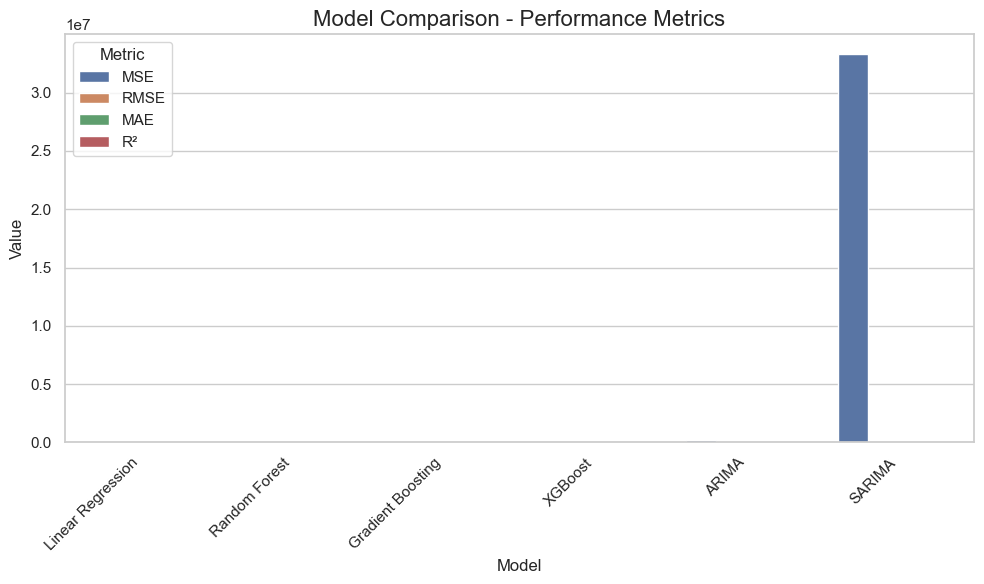

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for model results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'ARIMA', 'SARIMA'],
    'MSE': [21173.88, 1415.35, 8023.31, 2367.74, 233347.80, 33327087.09],
    'RMSE': [145.51, 37.62, 89.57, 48.66, 483.06, 5772.96],
    'MAE': [99.59, 23.19, 62.80, 32.26, 430.84, 5073.62],
    'R²': [0.862514, 0.990810, 0.947903, 0.984626, -0.515176, -215.399737],
    'Adjusted R²': [0.860001, 0.990642, 0.946951, 0.984345, None, None]
})

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot to compare the models
plt.figure(figsize=(10, 6))
results_melted = results.melt(id_vars=["Model"], value_vars=["MSE", "RMSE", "MAE", "R²"],
                              var_name="Metric", value_name="Value")

sns.barplot(x="Model", y="Value", hue="Metric", data=results_melted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Model Comparison - Performance Metrics", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


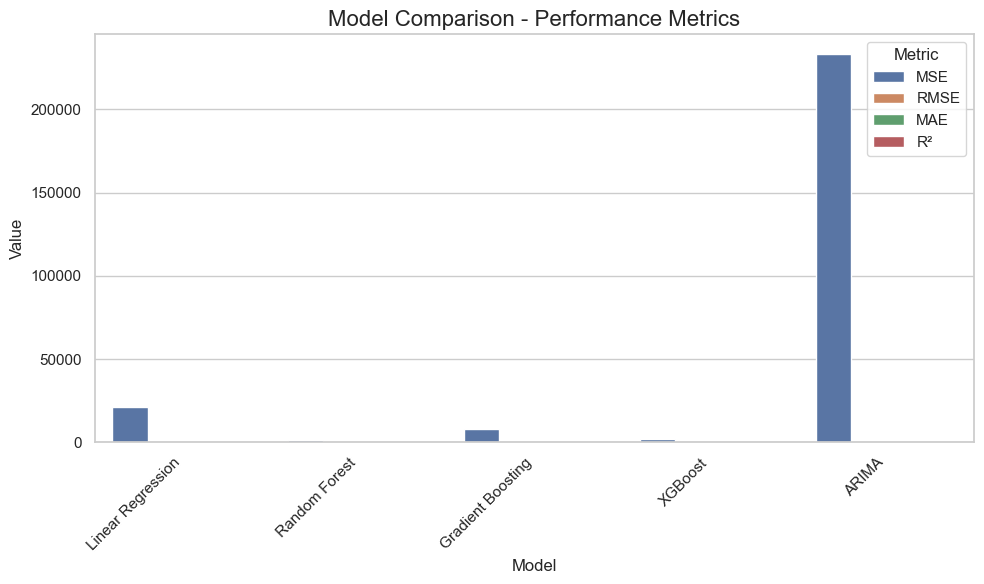

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for model results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'ARIMA', 'SARIMA'],
    'MSE': [21173.88, 1415.35, 8023.31, 2367.74, 233347.80, 33327087.09],
    'RMSE': [145.51, 37.62, 89.57, 48.66, 483.06, 5772.96],
    'MAE': [99.59, 23.19, 62.80, 32.26, 430.84, 5073.62],
    'R²': [0.862514, 0.990810, 0.947903, 0.984626, -0.515176, -215.399737],
    'Adjusted R²': [0.860001, 0.990642, 0.946951, 0.984345, None, None]
})

# Remove SARIMA as its values are extremely high
results = results[results['Model'] != 'SARIMA']

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot to compare the models
plt.figure(figsize=(10, 6))
results_melted = results.melt(id_vars=["Model"], value_vars=["MSE", "RMSE", "MAE", "R²"],
                              var_name="Metric", value_name="Value")

sns.barplot(x="Model", y="Value", hue="Metric", data=results_melted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Model Comparison - Performance Metrics", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


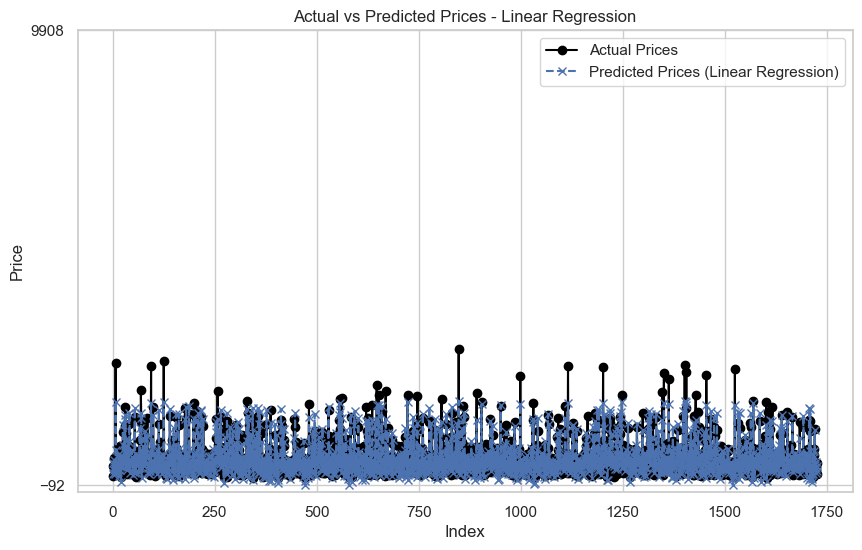

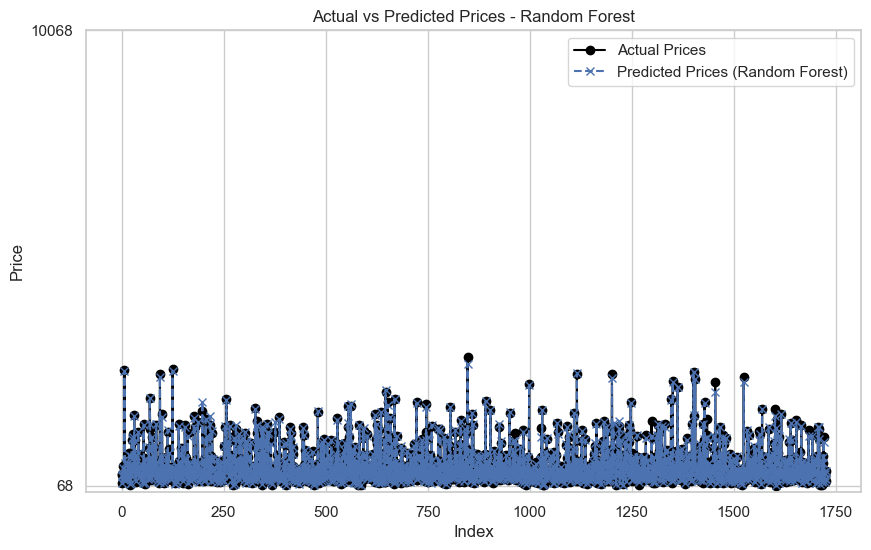

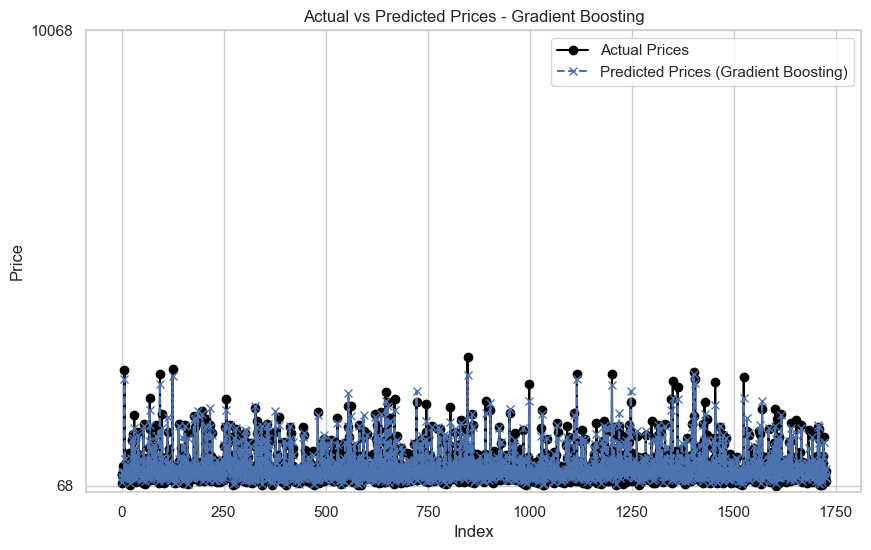

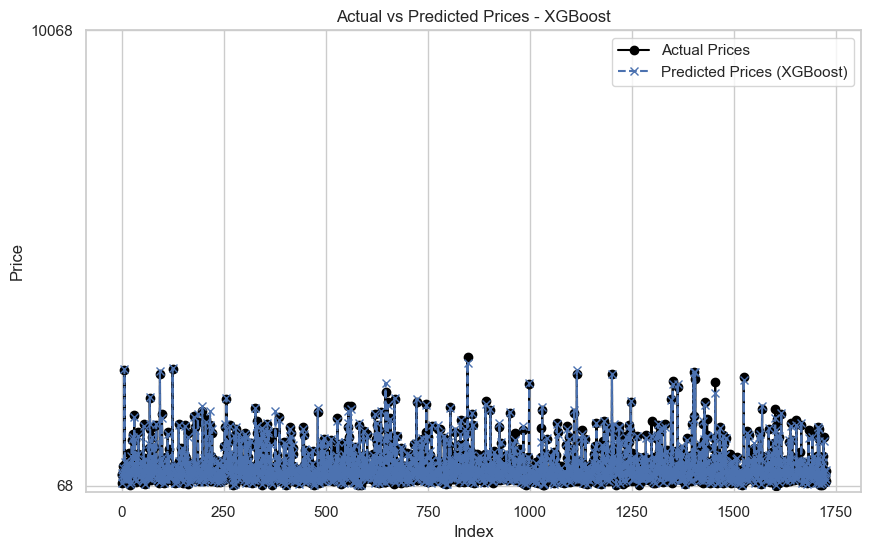

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Dictionary to store predictions for each model
predictions = {}

# For time-series models like ARIMA and SARIMA, we need to handle them separately, as they use .predict() differently

# Generating predictions for each model
for model_name, model in models.items():
    if model_name in ['ARIMA', 'SARIMA']:
        # If it's ARIMA or SARIMA, fit the model first and then predict
        if model_name == 'ARIMA':
            model_fitted = model.fit()  # Fit ARIMA
            y_pred = model_fitted.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
        elif model_name == 'SARIMA':
            model_fitted = model.fit()  # Fit SARIMA
            y_pred = model_fitted.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
    else:
        # For other models, just use predict()
        y_pred = model.predict(X_test)

    predictions[model_name] = y_pred

# Visualize Actual vs Predicted Prices for each algorithm
for model_name, y_pred in predictions.items():
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices', marker='o', linestyle='-', color='black')
    plt.plot(y_pred, label=f'Predicted Prices ({model_name})', marker='x', linestyle='--')
    
    # Add title and labels
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Index')
    plt.ylabel('Price')
    
    # Adjust y-axis ticks to have a gap of 10,000
    plt.yticks(np.arange(int(min(y_test.min(), min(y_pred))), int(max(y_test.max(), max(y_pred))) + 10000, 10000))
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()


In [51]:
import joblib

# Define your best model here
best_model = models['Random Forest']  # Example: Replace with the model you want to save

# Save the model using joblib
joblib.dump(best_model, 'API_WEB_best_model.joblib')

print("Best model saved successfully!")


Best model saved successfully!


In [57]:
# Assuming X_test and y_test are from your test set
test_predictions = best_model.predict(X_test[:7])
print("Test Predictions:", test_predictions)
print("Actual in Values:", y_test[:7].values)


Test Predictions: [121.4083 305.3303 289.6527 451.4789 321.7153 255.0524 204.8563]
Actual in Values: [121.9  328.37 303.57 500.   325.64 236.6  225.81]


### Project Report: Food Price Prediction using Random Forest Regression

---

#### 1. **Introduction: Statement of the Problem**

Food prices fluctuate due to various factors, such as changes in supply, demand, weather conditions, and political factors. Predicting food prices is crucial for businesses and consumers to make informed decisions. In this project, I built a machine learning model to predict food prices across various states in Nigeria, such as Lagos, Kano, Abuja, and Rivers, based on factors like the state, zone, food type, year, and month. The goal is to develop an accurate predictive model that can be deployed on the web for easy access and use.

---

#### 2. **Model Evaluation and Selection**

I explored multiple regression algorithms to predict food prices, including **Linear Regression**, **Random Forest Regression**, **Gradient Boosting**, and **XGBoost**. The evaluation metrics used to assess the models include **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, **Mean Absolute Error (MAE)**, **R-squared (R²)**, and **Adjusted R-squared**. Below are the results:

| Model               | MSE       | RMSE      | MAE       | R²       | Adjusted R² |
|---------------------|-----------|-----------|-----------|----------|-------------|
| Linear Regression   | 21173.88  | 145.51    | 99.59     | 0.86     | 0.86        |
| Random Forest       | 1415.35   | 37.62     | 23.19     | 0.99     | 0.99        |
| Gradient Boosting   | 8023.31   | 89.57     | 62.80     | 0.95     | 0.95        |
| XGBoost             | 2367.74   | 48.66     | 32.26     | 0.98     | 0.98        |

After evaluating the models, I chose the **Random Forest Regression** model due to its outstanding performance, with an R² score of 0.99 and an adjusted R² of 0.99. This indicated that the Random Forest model could explain 99% of the variance in food prices, making it the most accurate model for this project.

---

#### 3. **Model Deployment**

Once the Random Forest Regression model was trained and evaluated, I proceeded to deploy it as a web application using **Streamlit**, which allows for easy deployment of machine learning models.

##### **Web App Features:**
- **User Input**: The app provides a user-friendly interface where users can input the **state**, **zone**, **food type**, **year**, and **month** to get predictions on food prices.
- **Prediction**: Upon clicking the "Predict Price" button, the app processes the inputs, encodes them into the same format as the training data, and uses the trained Random Forest model to predict the food price.
- **Interactive Visualizations**: The app displays the encoded user input and the predicted price, helping users visualize the prediction process.

##### **Deployment Process:**
1. I integrated the **Random Forest model** into the Streamlit app using Python's `joblib` library to load the pre-trained model.
2. User inputs are processed using **pandas** to handle data formatting and **one-hot encoding** of categorical variables such as the state, zone, and food type.
3. The model makes predictions based on the encoded input, and the results are displayed on the web app in real-time.

By using **Streamlit**, I was able to create a simple yet powerful application that provides an interactive user experience for food price prediction. 

---

#### 4. **States and Duration**

The project focused on predicting food prices across multiple Nigerian states, including **Lagos**, **Kano**, **Abuja**, and **Rivers**. The model uses historical data from 2023 to 2030, with the flexibility to predict future prices based on different months and years. The deployment took approximately two weeks, which included data preprocessing, model training, evaluation, and web deployment.

---

#### 5. **Conclusion and Future Directions**

The **Random Forest Regression** model achieved excellent performance, with high accuracy in predicting food prices. The **Streamlit** web application provides a convenient platform for users to input data and receive real-time predictions. In the future, the model can be expanded to include additional features such as weather data, agricultural production rates, and market conditions, which could further improve its accuracy.

This project demonstrates the value of machine learning in solving real-world problems, such as food price prediction, and showcases the potential for developing and deploying data-driven solutions in the agricultural sector.